In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

from collections import Counter
import re
from lxml import etree 
from bz2file import BZ2File
import codecs
import nltk
import pickle

In [2]:
us_videos = pd.read_csv("USvideos1.csv")
listje= {1:'Film & Animation ',2:'Autos & Vehicles',10:'Music',15:'Pets & Animals',17:'Sports',18:'Short Movies',19:'Travel & Events',20:'Gaming',21:'Videoblogging',22:'People & Blogs',23:'Comedy',24:'Entertainment',25:'News & Politics',26:'Howto & Style',27:'Education',28:'Science & Technology',29:'Nonprofits & Activism',30:'Movies',31:'Anime/Animation',32:'Action/Adventure',33:'Classics',34:'Comedy',35:'Documentary',36:'Drama',37:'Family',38:'Foreign',39:'Horror',40:'Sci-Fi/Fantasy',41:'Thriller',42:'Shorts',43:'Shows',44:'Trailers'}
us_videos['category'] = us_videos['category_id']
us_videos['category'].replace(listje, inplace=True)

In [3]:
us_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


In [4]:
us_videos["tagssplitted"] = us_videos.tags.str.split('|')
us_videos["number_of_tags"] = us_videos['tagssplitted'].str.len()
us_videos["average_tag_length"] = us_videos.tags.str.len() / us_videos.number_of_tags




In [5]:
us_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,tagssplitted,number_of_tags,average_tag_length
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,[SHANtell martin],1,15.000000
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,"[last week tonight trump presidency, ""last wee...",4,25.500000
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,"[racist superman, ""rudy"", ""mancuso"", ""king"", ""...",23,13.652174
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment,"[rhett and link, ""gmm"", ""good mythical morning...",27,17.666667
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,"[ryan, ""higa"", ""higatv"", ""nigahiga"", ""i dare y...",14,8.571429


In [6]:
test = us_videos["dislikes"] > us_videos["likes"]
len (test[test == True])

519

0.012700875995521338

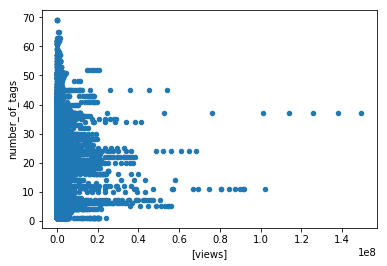

In [7]:
us_videos.plot(y="number_of_tags", x=["views"], kind="scatter")
us_videos['number_of_tags'].corr(us_videos['views'])

In [8]:
publishlist = us_videos.publish_time.tolist()
publishdatelist = {}
counter = 0
for item in publishlist:
    year = item[2:4]
    month = item[5:7]
    day = item[8:10]
    date = str.join('.', (year,day,month))
    publishdatelist[counter] = date
    counter +=1

In [9]:
publish = pd.DataFrame.from_dict(publishdatelist, orient='index')
publish.columns = ['publish_date']

In [10]:
df = pd.concat([us_videos, publish], axis=1)
df = df.drop(['thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed'],axis=1)
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,category,tagssplitted,number_of_tags,average_tag_length,publish_date
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,[SHANtell martin],1,15.000000,17.13.11
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,"One year after the presidential election, John...",Entertainment,"[last week tonight trump presidency, ""last wee...",4,25.500000,17.13.11
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,"[racist superman, ""rudy"", ""mancuso"", ""king"", ""...",23,13.652174,17.12.11
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,Today we find out if Link is a Nickelback amat...,Entertainment,"[rhett and link, ""gmm"", ""good mythical morning...",27,17.666667,17.13.11
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,I know it's been a while since we did this sho...,Entertainment,"[ryan, ""higa"", ""higatv"", ""nigahiga"", ""i dare y...",14,8.571429,17.12.11


In [11]:
df['title_occurence'] =  df.groupby(['channel_title'])['channel_title'].transform('count')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,category,tagssplitted,number_of_tags,average_tag_length,publish_date,title_occurence
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,[SHANtell martin],1,15.000000,17.13.11,66
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,"One year after the presidential election, John...",Entertainment,"[last week tonight trump presidency, ""last wee...",4,25.500000,17.13.11,24
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,"[racist superman, ""rudy"", ""mancuso"", ""king"", ""...",23,13.652174,17.12.11,39
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,Today we find out if Link is a Nickelback amat...,Entertainment,"[rhett and link, ""gmm"", ""good mythical morning...",27,17.666667,17.13.11,78
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,I know it's been a while since we did this sho...,Entertainment,"[ryan, ""higa"", ""higatv"", ""nigahiga"", ""i dare y...",14,8.571429,17.12.11,35


In [12]:
publishlist = df.publish_time.tolist()
publishdatelist = {}
counter = 0
for item in publishlist:
    year = item[2:4]
    month = item[5:7]
    day = item[8:10]
    date = str.join('.', (year,day,month))
    publishdatelist[counter] = date
    counter +=1

In [13]:
publish = pd.DataFrame.from_dict(publishdatelist, orient='index')
publish.columns = ['publish_date']

In [14]:
df = pd.concat([df, publish], axis=1)
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,category,tagssplitted,number_of_tags,average_tag_length,publish_date,title_occurence,publish_date
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,[SHANtell martin],1,15.000000,17.13.11,66,17.13.11
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,"One year after the presidential election, John...",Entertainment,"[last week tonight trump presidency, ""last wee...",4,25.500000,17.13.11,24,17.13.11
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,"[racist superman, ""rudy"", ""mancuso"", ""king"", ""...",23,13.652174,17.12.11,39,17.12.11
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,Today we find out if Link is a Nickelback amat...,Entertainment,"[rhett and link, ""gmm"", ""good mythical morning...",27,17.666667,17.13.11,78,17.13.11
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,I know it's been a while since we did this sho...,Entertainment,"[ryan, ""higa"", ""higatv"", ""nigahiga"", ""i dare y...",14,8.571429,17.12.11,35,17.12.11


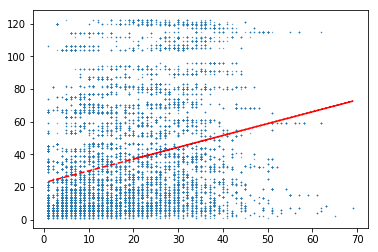

0.26731323888149722

In [15]:
#df.plot(y="number_of_tags", x=["title_occurence"], kind="scatter")
import matplotlib.pyplot as plt
x = df['number_of_tags'].tolist()
y = df['title_occurence'].tolist()
plt.scatter(x, y, s=0.1)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

df['number_of_tags'].corr(df['title_occurence'])

In [16]:
import seaborn as sns
import json
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob

(-0.5, 999.5, 499.5, -0.5)

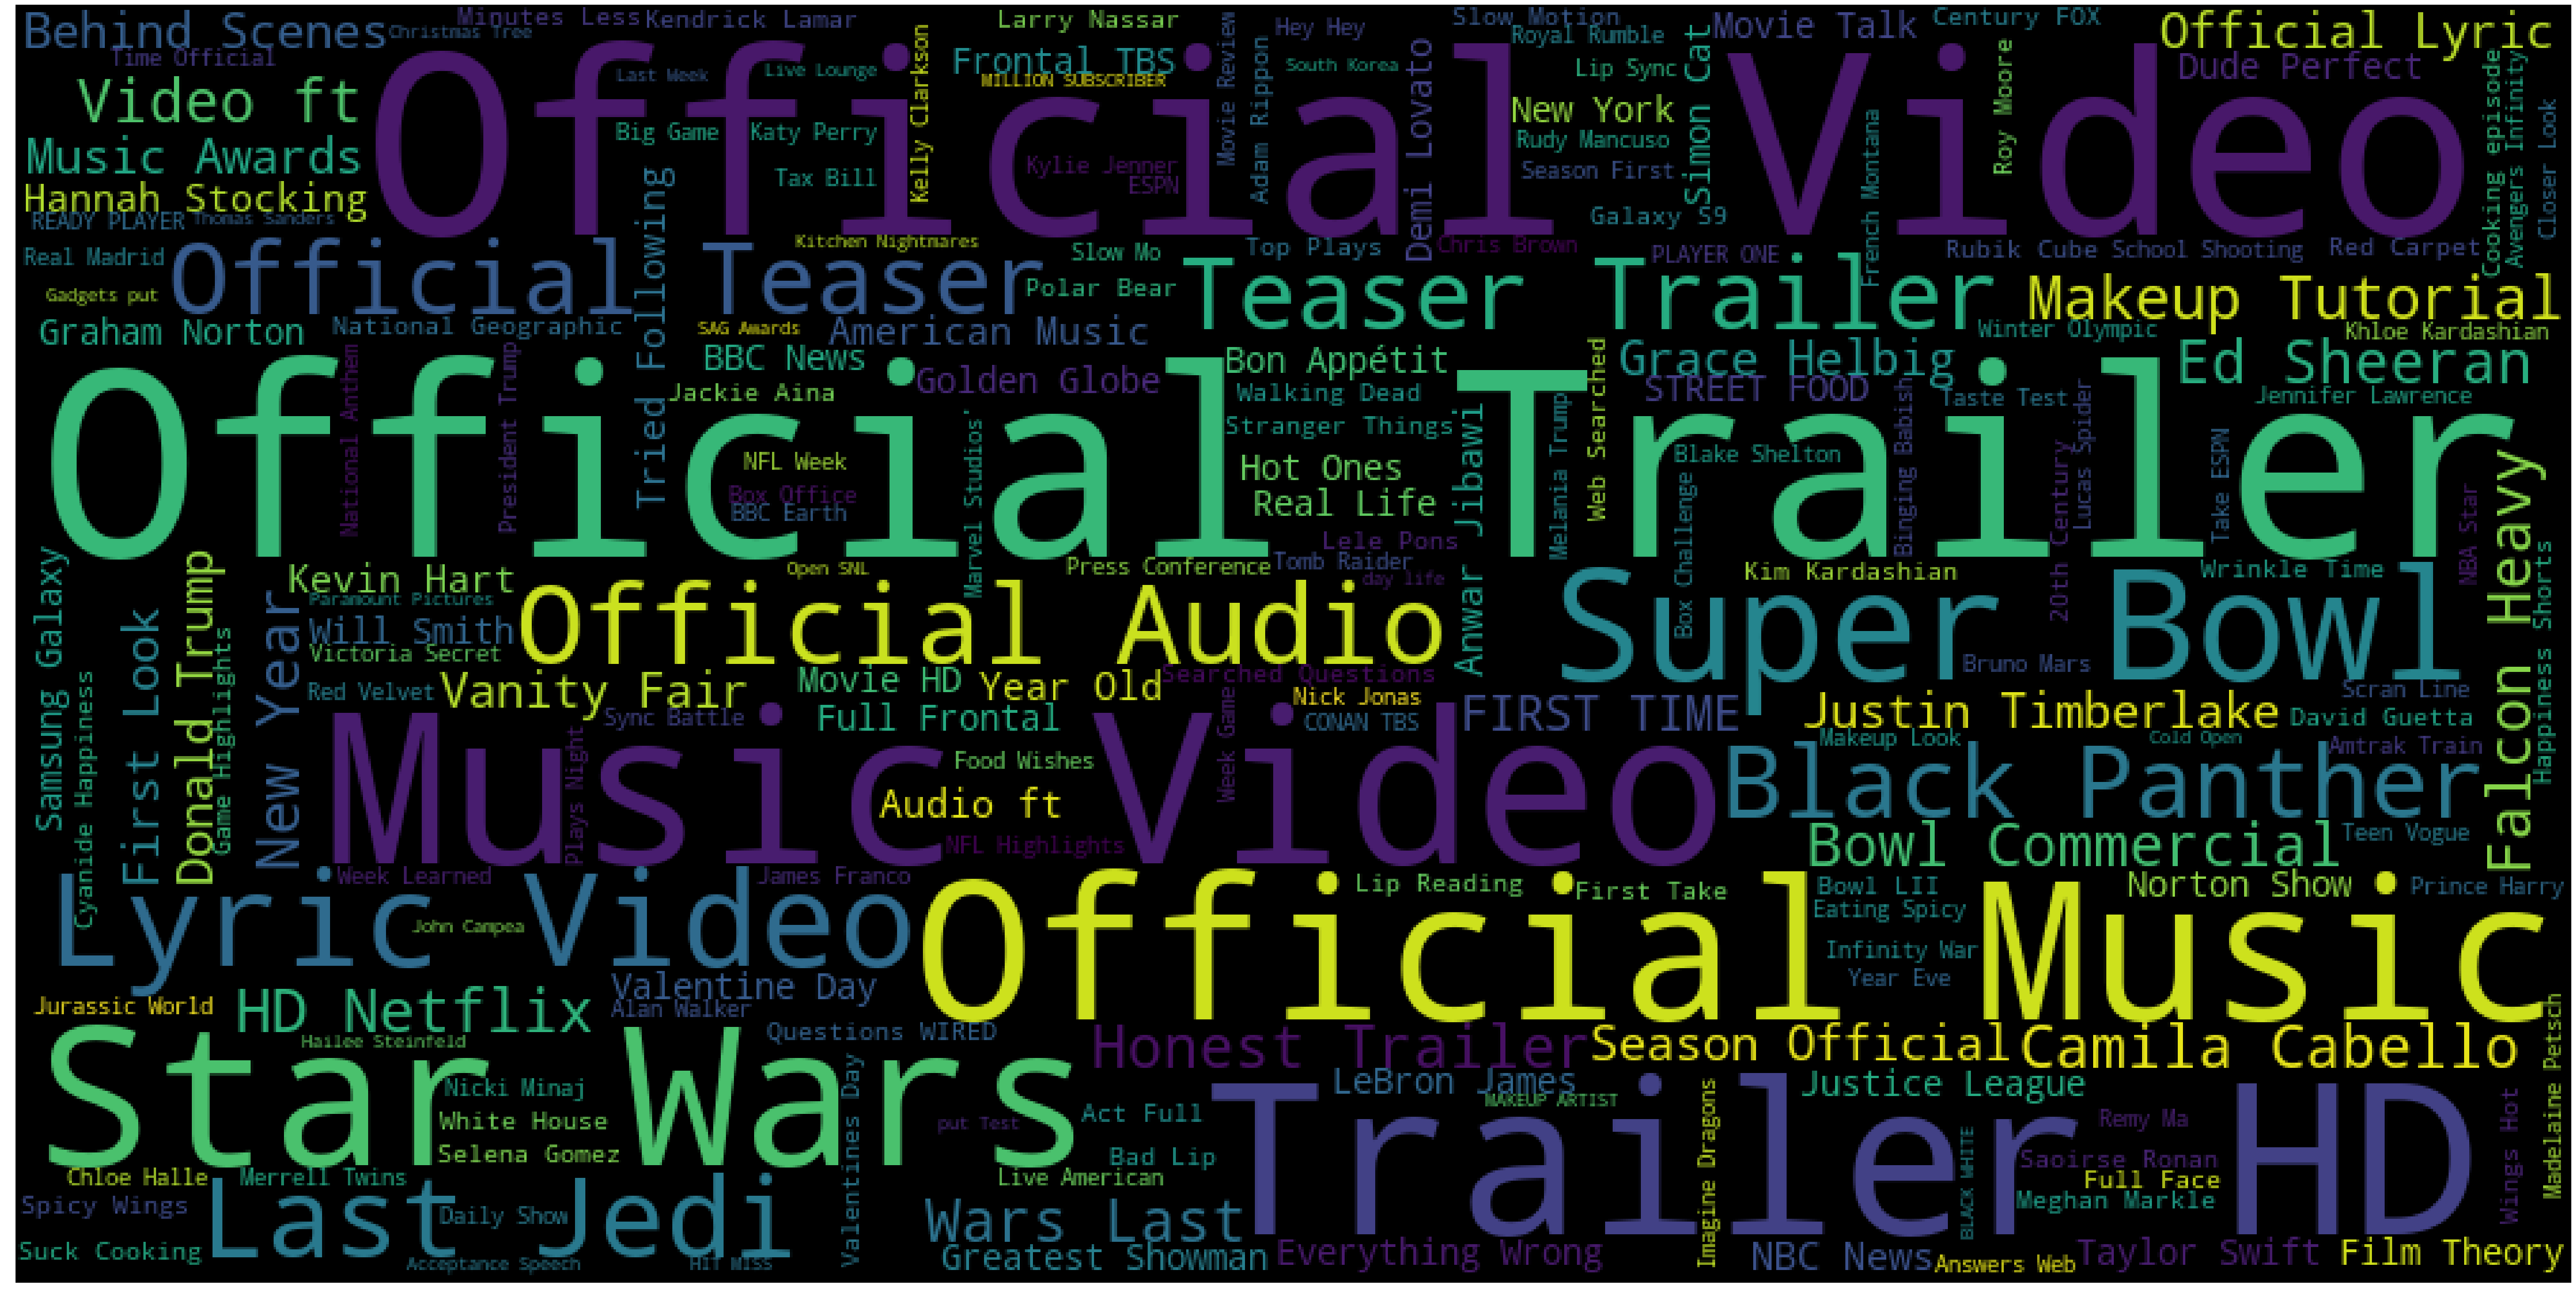

In [17]:
k= (' '.join(df['title']))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(150,50))
plt.imshow(wordcloud)
plt.axis('off')

Text(0.5,1,'Matrix')

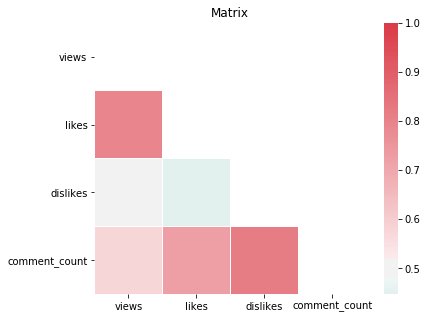

In [18]:
import matplotlib.gridspec as gridspec
matrix_corr = us_videos.loc[:,['views', 'likes', 'dislikes', 'comment_count']].corr()


masking = np.zeros_like(matrix_corr, dtype=np.bool)
masking[np.triu_indices_from(masking)] = True

fig = plt.figure(figsize=(14, 5))
grid_spec = gridspec.GridSpec(1, 2, width_ratios=[1,1])
cmap = sns.diverging_palette(180, 10, as_cmap=True)


correlation_fig = plt.subplot(grid_spec[0,0])
correlation_fig = sns.heatmap(matrix_corr, cmap=cmap, center=0.5,
            square=True, linewidths=.5, mask=masking)

correlation_fig.set_title('Matrix')